In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Reading Data
data = pd.read_csv("50_SupermarketBranches.csv")

In [3]:
#Features
X = data.iloc[: , 0:3]
#Target
y = data.iloc[:, 4]

In [5]:
#Data Information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Advertisement Spend   50 non-null     float64
 1   Promotion Spend       50 non-null     float64
 2   Administration Spend  50 non-null     float64
 3   State                 50 non-null     object 
 4   Profit                50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [6]:
print(data.describe())


# Data seems good and their counts don't have missing values
# The feature that we can remove is the State as It doesn't have an observed effect on the our model predicts

       Advertisement Spend  Promotion Spend  Administration Spend  \
count            50.000000        50.000000             50.000000   
mean          73721.615600    121344.639600         211025.097800   
std           45902.256482     28017.802755         122290.310726   
min               0.000000     51283.140000              0.000000   
25%           39936.370000    103730.875000         129300.132500   
50%           73051.080000    122699.795000         212716.240000   
75%          101602.800000    144842.180000         299469.085000   
max          165349.200000    182645.560000         471784.100000   

              Profit  
count      50.000000  
mean   112012.639200  
std     40306.180338  
min     14681.400000  
25%     90138.902500  
50%    107978.190000  
75%    139765.977500  
max    192261.830000  


In [7]:
print(data.head())


   Advertisement Spend  Promotion Spend  Administration Spend       State  \
0            165349.20        136897.80             471784.10    New York   
1            162597.70        151377.59             443898.53  California   
2            153441.51        101145.55             407934.54     Florida   
3            144372.41        118671.85             383199.62    New York   
4            142107.34         91391.77             366168.42     Florida   

      Profit  
0  192261.83  
1  191792.06  
2  191050.39  
3  182901.99  
4  166187.94  


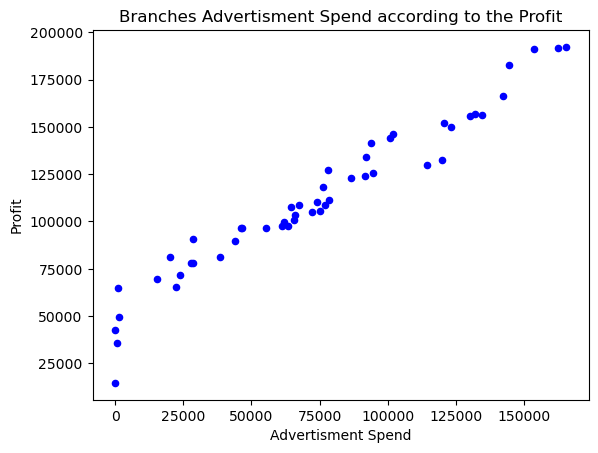

In [8]:
#Advertisment Spend according to the Profit
plt.scatter(X.iloc[: , 0], y,c='b',s=20)
plt.xlabel('Advertisment Spend')
plt.ylabel('Profit')
plt.title('Branches Advertisment Spend according to the Profit')
plt.show()


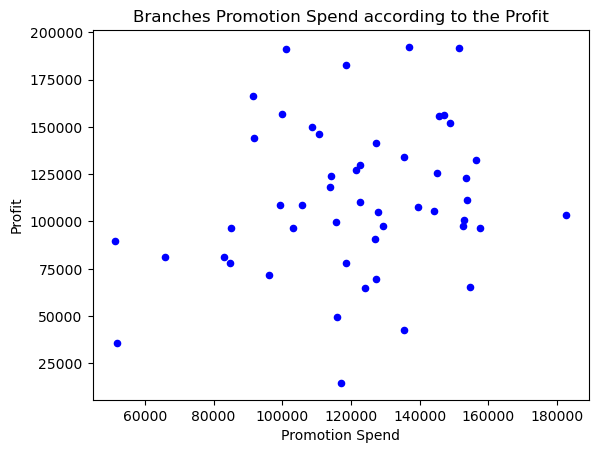

In [9]:
#Promotion Spend according to the Profit
plt.scatter(X.iloc[: , 1], y,c='b',s=20)
plt.xlabel('Promotion Spend')
plt.ylabel('Profit')
plt.title('Branches Promotion Spend according to the Profit')
plt.show()


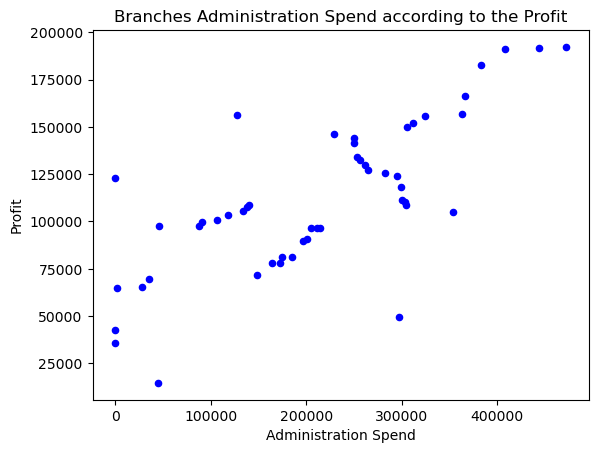

In [10]:
#Administration Spend according to the Profit
plt.scatter(X.iloc[: , 2], y,c='b',s=20)
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.title('Branches Administration Spend according to the Profit')
plt.show()

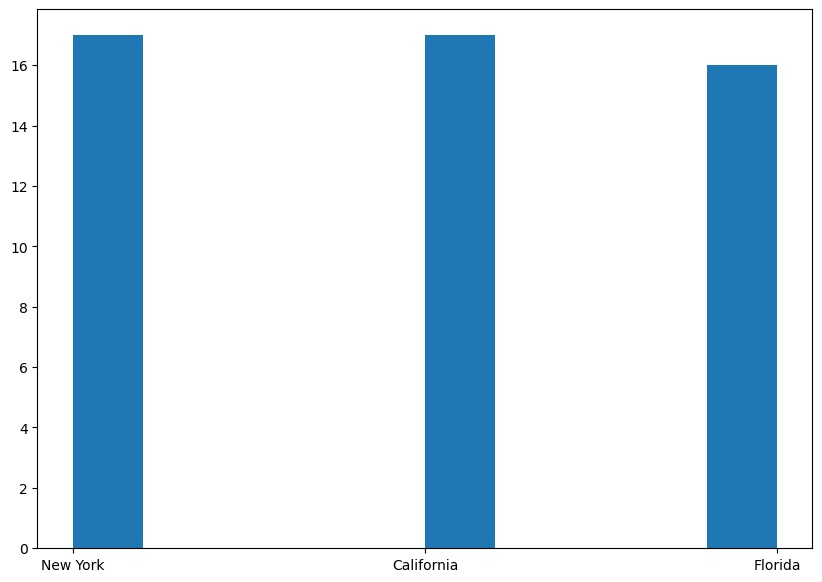

In [11]:
#Histogram for states frequencies 
b = data.iloc[: , 3]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(b)
plt.show()


In [12]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)


In [13]:
#Linear Regression Model

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

y_pred = reg.predict(X_test)
print("MAE :", mean_absolute_error(y_test,y_pred))
print("Linear Regression Accuracy: " , reg.score(X_test,y_test)*100 ,'%')

MAE : 7886.931451325089
Linear Regression Accuracy:  94.45033908402486 %


In [16]:
# Decision Tree Model

from sklearn.tree import  DecisionTreeRegressor
# Regression Dataset
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

y_pred2 = tree.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
print("MAE :", mean_absolute_error(y_test,y_pred2))

print("Tree Decision Accuracy: " , tree.score(X_test,y_test)*100 ,'%')


MAE : 3615.506000000011
Tree Decision Accuracy:  98.6903195187507 %


In [ ]:
"""
Tree Decision is a good choice for our model as it has a higher accuracy
"""